In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def nearest_date(target_date, date_series):
    """
    Find the date in the series that is closest to the target date.

    Args:
      target_date (str): A string representation of the target date in the format 'YYYY-MM-DD'.
      date_series (list[str]): A list of string representations of dates in the same format.

    Returns:
      str: The date in the series that is closest to the target date.
    """
    target_datetime = datetime.strptime(target_date, '%Y-%m-%d')
    date_differences = [(datetime.strptime(date, '%Y-%m-%d') - target_datetime).days for date in date_series]
    closest_index = min(range(len(date_differences)), key=lambda i: abs(date_differences[i]))
    return date_series[closest_index]


In [82]:
"""import the gas timeseries from the gas tab of Data.xlsx"""
gas = pd.read_excel('../data/data.xlsx', sheet_name='Gas', index_col=0)
"""import cpi data"""
cpi = pd.read_excel('../data/data.xlsx', sheet_name='CPI', index_col=0)
"""convert cpi to weekly series and interpolate"""
cpi = cpi.resample('W').interpolate()

"""inflation adjust gas prices with nearest cpi"""
[]

pydev debugger: Unable to find real location for: <string>
pydev debugger: Unable to find real location for: <frozen _collections_abc>
pydev debugger: Unable to find real location for: <frozen os>
pydev debugger: Unable to find real location for: C:\Users\jacob\AppData\Local\Temp\ipykernel_16428\1773942144.py
pydev debugger: Unable to find real location for: <frozen importlib._bootstrap_external>
pydev debugger: Unable to find real location for: <frozen posixpath>
pydev debugger: Unable to find real location for: <__array_function__ internals>
pydev debugger: Unable to find real location for: C:\Users\jacob\AppData\Local\Temp\ipykernel_16428\4288774786.py


TypeError: strptime() argument 1 must be str, not float

In [64]:
"""get some basic stats and put them in a frame for display"""
gas_stats = pd.DataFrame()
gas_stats['mean'] = gas.mean()
gas_stats['std'] = gas.std()
gas_stats['min'] = gas.min()
gas_stats['max'] = gas.max()
"""monthly standard deviation"""
gas_stats['std month'] = gas.resample('M').std().mean()
"""annual standard deviation"""
gas_stats['std year'] = gas.resample('Y').std().mean()
"""average weekly move"""
gas_stats['avg week move'] = gas.resample('W').mean().diff().abs().mean()

gas_stats

,mean,std,min,max,std month,std year,avg week move
Weekly U.S. All Grades Conventional Retail Gasoline Prices Dollars per Gallon,3.588577,0.469003,3.005,4.916,0.068447,0.236274,0.062883


In [68]:
"""make diffs"""
gas_diff = gas.diff()

gas_diff_stats = pd.DataFrame()

"""add some basic stats about the differences"""
gas_diff_stats['mean'] = gas_diff.mean()
gas_diff_stats['std'] = gas_diff.std()
gas_diff_stats['min'] = gas_diff.min()
gas_diff_stats['max'] = gas_diff.max()
gas_diff_stats['std month'] = gas_diff.resample('M').std().mean()
gas_diff_stats['std year'] = gas_diff.resample('Y').std().mean()
gas_diff_stats['avg week move'] = gas_diff.resample('W').mean().diff().abs().mean()

gas_diff_stats

,mean,std,min,max,std month,std year,avg week move
Weekly U.S. All Grades Conventional Retail Gasoline Prices Dollars per Gallon,-0.005058,0.090316,-0.477,0.166,0.060765,0.068546,0.053157


array([[<AxesSubplot: title={'center': 'Weekly U.S. All Grades Conventional Retail Gasoline Prices Dollars per Gallon'}>]],
      dtype=object)

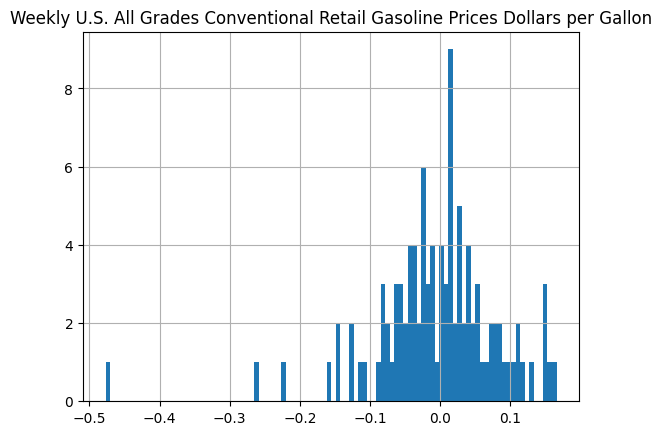

In [69]:
"""get a hist of the diffs"""
gas_diff.hist(bins=100)

In [70]:
"""percent of diffs over +.03"""
(gas_diff < -.076).sum() / len(gas_diff)


Weekly U.S. All Grades Conventional Retail Gasoline Prices Dollars per Gallon    0.144231
dtype: float64